In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, sparse_categorical_accuracy

In [2]:
# Avoid OOM error by setting GPU Memory Consumption to Growth
gpus = tf.config.list_physical_devices('GPU')
if (len(gpus) > 0) :
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print('You do not have a GPU available')

You do not have a GPU available


(511, 511, 3)


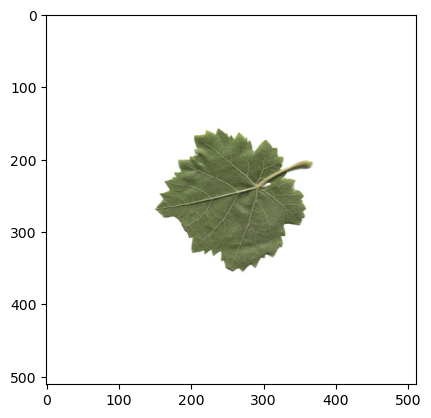

In [3]:
# Viewing an Image
img = cv2.imread(os.path.join('data', 'Ak', 'Ak (1).png'))
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# Remove dodgy images
# This cell can be used to remove images that add no value to data set.
# All the images in this dataset are fine.
'''data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)'''

"data_dir = 'data'\nimage_exts = ['jpeg', 'jpg', 'bmp', 'png']\nfor image_class in os.listdir(data_dir): \n    for image in os.listdir(os.path.join(data_dir, image_class)):\n        image_path = os.path.join(data_dir, image_class, image)\n        try: \n            img = cv2.imread(image_path)\n            tip = imghdr.what(image_path)\n            if tip not in image_exts: \n                print('Image not in ext list {}'.format(image_path))\n                os.remove(image_path)\n        except Exception as e: \n            print('Issue with image {}'.format(image_path))\n            # os.remove(image_path)"

In [5]:
# tf.keras.utils?? -> man command for jupyter
# Builds an image dataset on the fly. You need not build 
# labels, classes anything.
# data[0] will give error as this is not a preloaded dataset.
# This dataset is being created on the fly
data = tf.keras.utils.image_dataset_from_directory('data')

Found 500 files belonging to 5 classes.


In [7]:
# To solve the data[0] problem, we use a numpy iterator
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

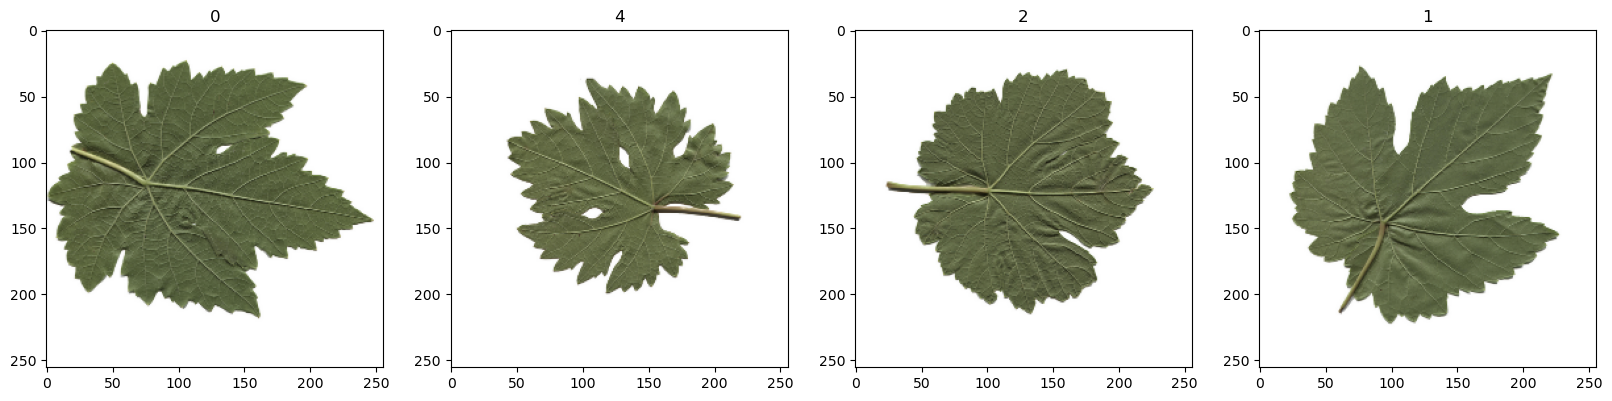

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
# Ak - 0
# Ala_Idris - 1
# Buzgulu - 2
# Dimnit - 3
# Nazli - 4

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [12]:
data.as_numpy_iterator().next()[0].max()

1.0

In [13]:
# There are 16 batches
len(data)

16

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
test_size

1

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(256,256,3)))
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(5, activation ="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0

In [19]:
model.compile('adam', loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [20]:
logdir='logs'

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
history = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 50s 4s/step - loss: 1.7003 - accuracy: 0.1790 - val_loss: 1.6086 - val_accuracy: 0.2292
Epoch 2/20
11/11 [==============================] - 44s 4s/step - loss: 1.6077 - accuracy: 0.2045 - val_loss: 1.6052 - val_accuracy: 0.2292
Epoch 3/20
11/11 [==============================] - 45s 4s/step - loss: 1.6133 - accuracy: 0.2045 - val_loss: 1.6085 - val_accuracy: 0.2188
Epoch 4/20
11/11 [==============================] - 45s 4s/step - loss: 1.6034 - accuracy: 0.2642 - val_loss: 1.6101 - val_accuracy: 0.1354
Epoch 5/20
11/11 [==============================] - 44s 4s/step - loss: 1.6164 - accuracy: 0.2216 - val_loss: 1.6072 - val_accuracy: 0.2188
Epoch 6/20
11/11 [==============================] - 45s 4s/step - loss: 1.6064 - accuracy: 0.1989 - val_loss: 1.6098 - val_accuracy: 0.1771
Epoch 7/20
11/11 [==============================] - 45s 4s/step - loss: 1.5958 - accuracy: 0.2443 - val_loss: 1.5813 - val_accuracy: 0.2917
Epoch 8/20
11/11 [==

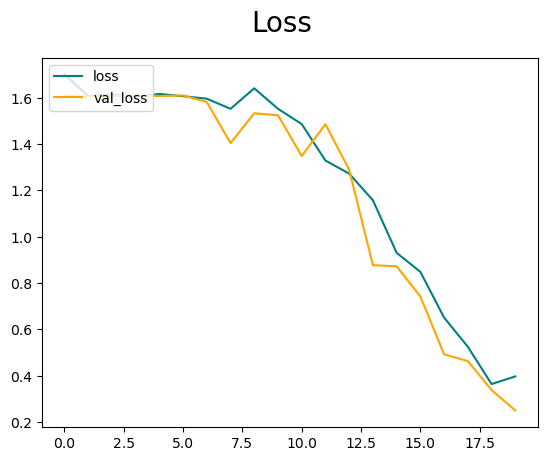

In [23]:
# if loss keeps going down and val_loss rising, it is a case of overfitting
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

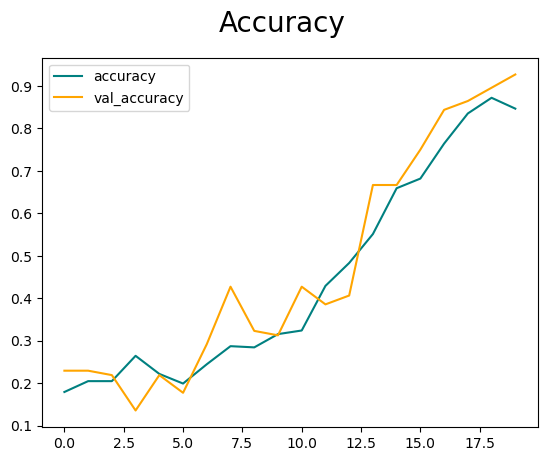

In [24]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [25]:
pre = Precision()
re = Recall()

In [26]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = tf.argmax(model.predict(x), axis = 1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [27]:
print(pre.result().numpy(), re.result().numpy())

1.0 0.9285714


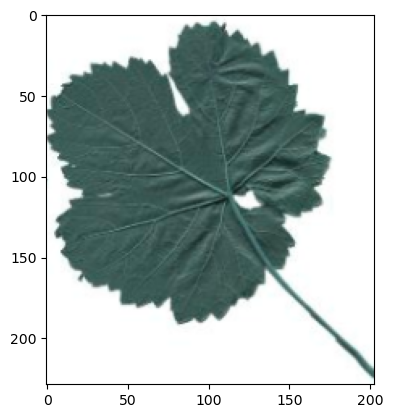

In [28]:
img = cv2.imread('test_img.png')
plt.imshow(img)
plt.show()

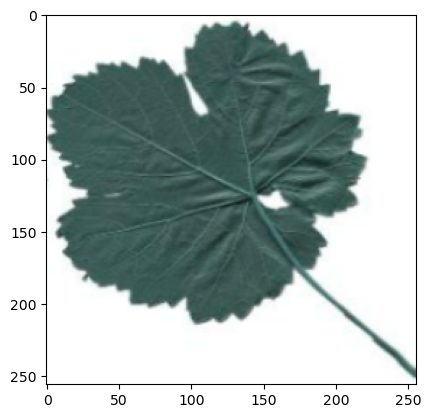

In [29]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 323ms/step


In [31]:
yhat

array([[0.04920212, 0.14921342, 0.96625245, 0.11309213, 0.96717995]],
      dtype=float32)